# Welcome - Sustainable Clothing
Solution Extraction is a process by which we take a Project Drawdown Solution, in the form of an Excel Workbook, and create a corresponding python solution that implements _most_ of the same functionality.  This notebook will guide you through that process.  See also `Extraction_Guide.md` for more explanation and notes.

The first step is _make a copy of this notebook_.  Give it a name that represents the model you will be working on.  That way it won't collide with other notebooks when you check in or merge fixes.

## Setup


In [1]:
from tools import solution_xls_extract as sxe
from tools import create_expected_zip as cez
from tools import expected_ghost
from tests import test_excel_integration as tei
from solution import factory
from pathlib import Path
import pandas as pd
import openpyxl
import importlib

# Create a variable to skip any file/extraction processes, if you just want to run load the solution and run the test
skipExtractionProcess = True

In [2]:
# Identify where you will be storing your Excel file while you work on it, and what directory the final result will go into.

excelfile = Path("C:\\Development\\ProjectDrawdown\\Working\\Sustainable Clothing-RRS.IP-0121MRG_2021.xlsm")
outdir = Path("C:\\Development\\ProjectDrawdown\\Working\\solutions\\solution\\sustainableclothing")

if skipExtractionProcess == False:
  outdir.mkdir(parents=True, exist_ok=True)

In [3]:
# If you make changes to the extraction code (or any other code), reload it
# NOTE: This kind of reloading DOES NOT work for solutions themselves, unfortunately.  If you re-generate or modify your solution,
# you have to restart the Jupyter kernel to get it to reload properly.

if skipExtractionProcess == False:
  importlib.reload(sxe)

## Extract Code
Exctraction is done by the `sxe.ouput_solution_python_file` function.  This function reads most of the data it needs to extract from the `ScenarioRecord` tab and additional data from the TAM, Adoption and other tabs, and writes them to a solution directory in the form of an `__init__.py` file and a bunch of csv and json files.  All of the solutions in `/solution` were produced this way.

In [4]:
# Expect to see some warnings from openpyxl; these can be ignored.  If there are other warnings, please note them, but they are not necessarily
# a problem.

if skipExtractionProcess == False:
  sxe.output_solution_python_file(outputdir=outdir, xl_filename=str(excelfile))

In [5]:
# %debug is your friend.  If the extraction fails with an exception, jump in and see if anything looks wrong

# %debug

If you are working on one of the [Excel import issues](https://github.com/ProjectDrawdown/solutions/issues?q=is%3Aissue+is%3Aopen+label%3A%22Excel+Import%22), please add comments to it describing problems you run into.  And if you have found something that looks like a general problem, please [open a new issue](https://github.com/ProjectDrawdown/solutions/issues/new) for it on the github repo.

I can't overemphasize this: 
> **Finding, researching and reporting issues is hugely valuable for us, even if you don't fully solve them.**


## Load Code / Sniff Test

Once the code has been sucessfully extracted and placed into a directory in `solution/`, all the tools that work with solutions should become available.

In [6]:
# factory.one_solution_scenarios loads a single solution, by name.  It returns a constructor that can construct scenario objects
# for this solution, and a list of the scenario names.

(constructor,scenarios) = factory.one_solution_scenarios("sustainableclothing")

In [7]:
# What scenarios did we get?

scenarios

['PDS1-8p2050-Dec2020',
 'PDS2-32p2050-Dec20',
 'PDS2-32p2050-Jan2021',
 'PDS3-56p2050-Dec20',
 'PDS3-56p2050-Jan2021']

In [8]:
# First Scenario
# myscenario = constructor(scenarios[0])
'''
Ran this one with no errors
'''

# Let's build the 2nd one
# myscenario = constructor(scenarios[1])
'''
This scenario breaks with the following error:
TypeError: argument of type 'NoneType' is not iterable
at __init__.py line 173
Debugging into this, I believe this issue is because \solution\sustainableclothing\ac\PDS2-32p2050-Dec20.json file 
is missing the "soln_pds_adoption_scenarios_included" section
'''

# myscenario = constructor(scenarios[2])
'''
Same as last
This scenario breaks with the following error:
TypeError: argument of type 'NoneType' is not iterable
at __init__.py line 173
Debugging into this, I believe this issue is because \solution\sustainableclothing\ac\PDS2-32p2050-Jan2021.json file 
is missing the "soln_pds_adoption_scenarios_included" section

'''

# myscenario = constructor(scenarios[3])
'''
Ran this one with no errors
'''

myscenario = constructor(scenarios[4])
'''
Ran this one with no errors
'''

'\nRan this one with no errors\n'

In [9]:
# %debug is your friend.

# %debug

## Look at some results

TODO: it would be nice put some examples below, for example showing a little graph of something.

In [10]:
# See results

dfCo2 = myscenario.c2.co2_mmt_reduced()
dfCo2
# dfCo2.dtypes



,World,OECD90,Eastern Europe,Asia (Sans Japan),Middle East and Africa,Latin America,China,India,EU,USA
Year,,,,,,,,,,
2014,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020,249.206452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021,297.409064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022,347.467802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:title={'center':'World CO2 MMT Reduced by Year'}, xlabel='Year'>

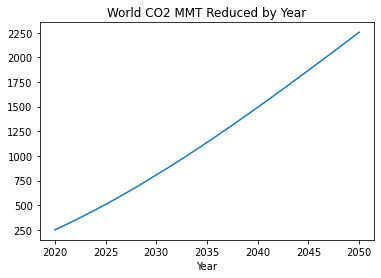

In [11]:
# Plot a basic graph
dfCo2.loc[2020:2050, 'World'].plot(title="World CO2 MMT Reduced by Year")

## Create Test Results

**This step requires the Excel application, and thus only can be run on Windows or Mac.**

Create a clean temporary directory to generate the test set in.  Put (a copy of) your Excel spreadsheet in that directory.

Follow the instructions in `tools/CREATING_EXPECTED_ZIP.md` to create the CSV files in that directory.

In [12]:
# Run the VB macros first!
# NC - following the macro instructions
# on running the macro:
#  1) On the question of replacing the scenario into model, answered "Yes"
#  2) On the question of replacing the formulae with the values, answered "No"

# Assemble the resulting csv files into the expected_zip file

csvdirectory = Path("C:\\Development\\ProjectDrawdown\\Working\\expectedzips")
if skipExtractionProcess == False:
  cez.create_expected_zip(csvdirectory)

In [13]:
# Move the resulting file where it belongs.

if skipExtractionProcess == False:
  testdirectory = outdir / "testdata"
  testdirectory.mkdir(exist_ok=True)

# !cp $csvdirectory/expected.zip $testdirectory/expected.zip

# Just copied the file over manually 

## Create the Test

Now we are going to add your new solution to the testing infrastructure.  In an editor, open the file `tests/test_excel_integration.py`.
Scroll down to the bottom, copy one of the test functions there and modify it to fit your new model.  It will look something
like the following, where you subsitute `TESTNAME` with a unique name for your test, and `MODULE` with the name of your solution module (which is the same as the name of the directory it is in).

```
def test_<SOLUTIONNAME>_RRS():
    from solution import <MODULE>
    zipfilename = str(solutiondir.joinpath(
        '<MODULE>', 'testdata', 'expected.zip'))
    zip_f = zipfile.ZipFile(file=zipfilename)
    for scenario in <MODULE>.scenarios.keys():
        obj = <MODULE>.Scenario(scenario=scenario)
        verify = RRS_solution_verify_list(obj=obj, zip_f=zip_f)
        check_excel_against_object(
            obj=obj, zip_f=zip_f, scenario=scenario, verify=verify)
```

Be sure to note whether your model is an RSS model or a Land model and copy the right kind of test!

## Run the Test

The following shell command runs the test you just created (swapping in your solution name, of course)

In [14]:
# You could pytest from the shell, but it is a little more convenient to call the 
# test function directly:
# tei.test_SustainableClothing_RRS()

# The test runs, but gotten an AssertionError in running the tests. 
# But actually, we will use the newer test function call, so we can skip those two Scenarios that might have data errors


If the test throws an exception, you might be tempted to use %debug to look at it. Unfortunately the main location where exceptions get thrown has already lost the context of the error. Instead what you generally have to do is figure out where in the test suite the failure was and add a breakpoint() (also known as import pdb; pdb.set_trace() to old-schoolers) there, then run it again. Hint: the error message will probably contain an Excel range, like B91:C137. This is a good string to search for in test_excel_integration.py.

From there, you work your way back to the same questions we were working on above: is this a failure in extraction, model code, the excel workbook, or the test? Rinse and repeat.

## Hot off the Press for the Hackathon: Improved Test Control!

If you look at the last two solution test definitions in `tests\test_excel_integration.py`, you will see they have a couple of extra arguments:
 * `scenario_skip`: if present, an array of scenario indices to skip over
 * `test_skip`: if present, an array of strings that should match the descriptions of tests to skip
 * `test_only`: if present, an array of strings such that _only_ tests whose description matches one of them will be executed.
 
 So for example, you could skip the second scenario, and only do the 'First Cost' and 'Operating Cost' tests, but skip the first 'First Cost' test, with the following:

In [15]:
# Running some tests:
# Testing all *datapoints?* but skipping the 2 scenarios
# tei.test_SustainableClothing_RRS(scenario_skip=[1,2])
'''
AssertionError: Solution: Sustainable Clothing Scenario: PDS1-8p2050-Dec2020 TAM Data CI50:CM96
DataFrames differ:
Err [1][0] : '1.947587154992937e-05' != '1.94759e-05'
Looks like this is a rounding error
'''

# Test based off the example, skipping the 2 scenarios, only testing First Cost and Operating Cost, and skipping some test
# tei.test_SustainableClothing_RRS(scenario_skip=[1,2], test_only=['First Cost', 'Operating Cost'], test_skip=['C37:C82'] )

# Don't skip anything yet, and just test First Cost
tei.test_SustainableClothing_RRS(scenario_skip=[1,2], test_only=['First Cost'])

Checking PDS1-8p2050-Dec2020
TAM Data
    **** Skipped 60 tests
Helper Tables
    **** Skipped 2 tests
Emissions Factors
    **** Skipped 2 tests
Unit Adoption Calculations
    **** Skipped 30 tests
First Cost


AssertionError: Solution: Sustainable Clothing Scenario: PDS1-8p2050-Dec2020 First Cost E37:E82
DataFrames differ:
Err [3][0] : '0.0' != '91882559.49'
Err [4][0] : '1376218815.4773905' != '198613506.4'
Err [24][0] : '1138445062.0572414' != '1230327622.0'
Err [25][0] : '2596672684.313334' != '1419067375.0'
Err [45][0] : '4778947949.081189' != '4870830509.0'


In [ ]:
'''
Assertion Errors on Sustainable Clothing Scenario: PDS1-8p2050-Dec2020 First Cost E37:E82
e.g.
DataFrames differ:
Err [0][0] : '26452419.4909273' != '942666448.0'
'''

# PDS1-8p2050-Dec2020 is First Scenario, maybe we can try and find the first cost data in here?
# myscenario = constructor(scenarios[0])

# myscenario

Copy from one of those last two tests and you will be able to control your testing without having to resort to hacks like commenting out tests.


# Tips

## Don't forget to restart the Jupyter Notebook kernel if you have modified code

If you change code you need to either reload the library (the 3nd cell of this notebook) or restart the kernel.

## When comparing to Excel, make sure you've loaded the right Scenario

On the `ScenarioRecord` tab, cell `B9` shows the currently loaded scenario.  When a workbook is first opened, this is usally empty, meaning you don't know which
scenario was last loaded.  Select the scenario you are debugging against from the dropdown, and click on 'Load Scenario'.

## Beautifier for Excel Formulas

Are you looking at an excel formula with five nested `IF(...` expressions?  Try [https://www.excelformulabeautifier.com/](https://www.excelformulabeautifier.com/).  You're welcome.

# You Finished!
Did you get a clean test run?  Hurrah!  You've finished this import task.  Project Drawdown thanks you!